In [1]:
import pandas as pd
df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
df.drop('Time',axis=1,inplace=True)

Total rows in data: 284807
0    284315
1       492
Name: Class, dtype: int64


<AxesSubplot:>

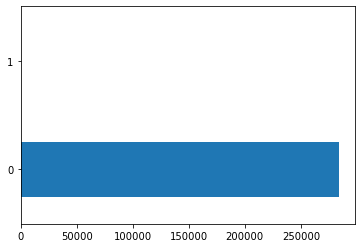

In [4]:
import matplotlib.pyplot as plt

print('Total rows in data:',df.shape[0])
print(df.Class.value_counts())
df['Class'].value_counts().plot(kind='barh')

### Yukarıdaki çıktı dağılımından, Verilerin aşırı dengesiz bir durumda olduğu sonucuna varabiliriz.

### Boyut Azaltma için PCA kullanacağız

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df.drop('Class',axis=1))

principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])
final_df = pd.concat([df['Class'], principalDf],axis=1)
final_df.head()

,Class,principal component 1,principal component 2
0,0,61.271382,1.319371
1,0,-85.661826,-1.043917
2,0,290.316696,0.810803
3,0,35.151659,0.928455
4,0,-18.360281,1.317518


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(final_df.drop('Class',axis=1), 
                                                  final_df['Class'],
                                                  test_size=0.2,
                                                  random_state=100)

# Method 1 - Support Vector Machine

In [7]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print('Distribution of y_train set Before over and under sampling: ', Counter(y_train))

under = RandomUnderSampler(sampling_strategy=0.002)
over = SMOTE(sampling_strategy=0.01)

X_train_smote, y_train_smote = under.fit_resample(X_train, y_train)
X_train_both, y_train_both = over.fit_resample(X_train_smote, y_train_smote)

print('Distribution of y_train set Before over and under sampling: ', Counter(y_train_both))

Distribution of y_train set Before over and under sampling:  Counter({0: 227449, 1: 396})
Distribution of y_train set Before over and under sampling:  Counter({0: 198000, 1: 1980})


In [8]:
from sklearn.linear_model import SGDClassifier


model = SGDClassifier()
model.fit(X_train_both, y_train_both)

SGDClassifier()

In [9]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve

prediction = model.predict(X_test)
print('classification report:', classification_report(prediction, y_test))
print('-'*40)
print('accuracy_score : ',accuracy_score(prediction, y_test))

classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56943
           1       0.06      0.32      0.10        19

    accuracy                           1.00     56962
   macro avg       0.53      0.66      0.55     56962
weighted avg       1.00      1.00      1.00     56962

----------------------------------------
accuracy_score :  0.9981917769741231


# Method 2 - Random Forest

In [10]:
X = df.drop(['Class'], axis=1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [17]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

In [18]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

In [19]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.92      0.76      0.83       111

    accuracy                           1.00     71202
   macro avg       0.96      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [20]:
cm = confusion_matrix(y_test, y_rf)
print(cm)

[[71084     7]
 [   27    84]]


# Method 3 - Oversampling 

In [21]:
X = df.drop(['Class'], axis=1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [23]:
y_train.value_counts()

0    213224
1    213224
Name: Class, dtype: int64

In [24]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

In [25]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.85      0.79      0.82       111

    accuracy                           1.00     71202
   macro avg       0.92      0.90      0.91     71202
weighted avg       1.00      1.00      1.00     71202



In [26]:
cm = confusion_matrix(y_test, y_rf)
print(cm)

[[71075    16]
 [   23    88]]


# Method 4 - Downsampling

In [27]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [28]:
from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)

In [29]:
y_train.value_counts()

0    213224
1    213224
Name: Class, dtype: int64

In [30]:
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

In [31]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.84      0.78      0.81       111

    accuracy                           1.00     71202
   macro avg       0.92      0.89      0.91     71202
weighted avg       1.00      1.00      1.00     71202



In [32]:
cm = confusion_matrix(y_test, y_rf)
print(cm)

[[71075    16]
 [   24    87]]
